# Starbucks Capstone Challenge

### Introduction

This data set contains simulated data that mimics customer behavior on the Starbucks rewards mobile app. Once every few days, Starbucks sends out an offer to users of the mobile app. An offer can be merely an advertisement for a drink or an actual offer such as a discount or BOGO (buy one get one free). Some users might not receive any offer during certain weeks. 

Not all users receive the same offer, and that is the challenge to solve with this data set.

Your task is to combine transaction, demographic and offer data to determine which demographic groups respond best to which offer type. This data set is a simplified version of the real Starbucks app because the underlying simulator only has one product whereas Starbucks actually sells dozens of products.

Every offer has a validity period before the offer expires. As an example, a BOGO offer might be valid for only 5 days. You'll see in the data set that informational offers have a validity period even though these ads are merely providing information about a product; for example, if an informational offer has 7 days of validity, you can assume the customer is feeling the influence of the offer for 7 days after receiving the advertisement.

You'll be given transactional data showing user purchases made on the app including the timestamp of purchase and the amount of money spent on a purchase. This transactional data also has a record for each offer that a user receives as well as a record for when a user actually views the offer. There are also records for when a user completes an offer. 

Keep in mind as well that someone using the app might make a purchase through the app without having received an offer or seen an offer.

### Example

To give an example, a user could receive a discount offer buy 10 dollars get 2 off on Monday. The offer is valid for 10 days from receipt. If the customer accumulates at least 10 dollars in purchases during the validity period, the customer completes the offer.

However, there are a few things to watch out for in this data set. Customers do not opt into the offers that they receive; in other words, a user can receive an offer, never actually view the offer, and still complete the offer. For example, a user might receive the "buy 10 dollars get 2 dollars off offer", but the user never opens the offer during the 10 day validity period. The customer spends 15 dollars during those ten days. There will be an offer completion record in the data set; however, the customer was not influenced by the offer because the customer never viewed the offer.

### Cleaning

This makes data cleaning especially important and tricky.

You'll also want to take into account that some demographic groups will make purchases even if they don't receive an offer. From a business perspective, if a customer is going to make a 10 dollar purchase without an offer anyway, you wouldn't want to send a buy 10 dollars get 2 dollars off offer. You'll want to try to assess what a certain demographic group will buy when not receiving any offers.

### Final Advice

Because this is a capstone project, you are free to analyze the data any way you see fit. For example, you could build a machine learning model that predicts how much someone will spend based on demographics and offer type. Or you could build a model that predicts whether or not someone will respond to an offer. Or, you don't need to build a machine learning model at all. You could develop a set of heuristics that determine what offer you should send to each customer (i.e., 75 percent of women customers who were 35 years old responded to offer A vs 40 percent from the same demographic to offer B, so send offer A).

# Data Sets

The data is contained in three files:

* portfolio.json - containing offer ids and meta data about each offer (duration, type, etc.)
* profile.json - demographic data for each customer
* transcript.json - records for transactions, offers received, offers viewed, and offers completed

Here is the schema and explanation of each variable in the files:

**portfolio.json**
* id (string) - offer id
* offer_type (string) - type of offer ie BOGO, discount, informational
* difficulty (int) - minimum required spend to complete an offer
* reward (int) - reward given for completing an offer
* duration (int) - time for offer to be open, in days
* channels (list of strings)

**profile.json**
* age (int) - age of the customer 
* became_member_on (int) - date when customer created an app account
* gender (str) - gender of the customer (note some entries contain 'O' for other rather than M or F)
* id (str) - customer id
* income (float) - customer's income

**transcript.json**
* event (str) - record description (ie transaction, offer received, offer viewed, etc.)
* person (str) - customer id
* time (int) - time in hours since start of test. The data begins at time t=0
* value - (dict of strings) - either an offer id or transaction amount depending on the record

**Note:** If you are using the workspace, you will need to go to the terminal and run the command `conda update pandas` before reading in the files. This is because the version of pandas in the workspace cannot read in the transcript.json file correctly, but the newest version of pandas can. You can access the termnal from the orange icon in the top left of this notebook.  

You can see how to access the terminal and how the install works using the two images below.  First you need to access the terminal:

<img src="pic1.png"/>

Then you will want to run the above command:

<img src="pic2.png"/>

Finally, when you enter back into the notebook (use the jupyter icon again), you should be able to run the below cell without any errors.

# Project Overview:
Personalization and reduction in intrusiveness of advertising messages help to improve retention of customers, maximize marketing efficiencies, and improve the return on investments (ROI)
Every advertiser’s goal is peak relevance. And the way to relevance is segmentation. The narrower your audience segments become, the closer you get to delivering the 1:1 personalization that customers crave.
On similar lines, Starbucks in the simulated dataset provided by Udacity, targets its audience and customers through various kinds of offers namely: ‘BOGO’(buy one get one free),‘discount, and ‘’informational offers.
The channels used to reach the customers are also multiple namely: Web, email, Social media, and mobile.
Starbucks and Udacity have provided a simplified version of Starbucks app’s data set for this Capstone Project
There is some additional information provided to guide us through the process of data exploration, cleansing and feature engineering:

# Problem Statement
With the given datasets and background information provided, I am interested in exploring the following with the Starbucks dataset for this Capstone project:
• Predict the response to an offer - If the consumer will complete an offer or not? 
• Measure the accuracy of the model, precision, and F1-Score
• Explore which input parameters/features play a critical role in predicting whether the customer will take the offer or not.

#Strategy
- We will use data wrangling techniques to clean the data,and perform necessary conversion of columns to suitable data types 
- We will use statistics and visualizations as needed to help us understand the 3 datasets profile,portfolio,and transcript better
- We will use 3 models Logistic Regression as the base model, Random Forest and Decision Tree classifiers as the additional models to predict if a particular offer will be completed by the customer or not.

# Metrics
As described in the Udacity course module: Precision & Recall Precision and recall are just different metrics for measuring the "success" or performance of a trained model.
• Precision is defined as the number of true positives (truly fraudulent transaction data, in this case) over all positives, and will be the higher when the number of false positives is low. 
• recall is defined as the number of true positives over true positives plus false negatives and will be higher when the number of false negatives is low. Both consider true positives and will be higher for high, positive accuracy, too 
• F1-Score is the weighted average of Precision and Recall
-Confusion Matrix is a table which is used to evaluate the performance of a classification model.

In [1]:
# Load libraries
import pandas as pd
import numpy as np
import math
import json
import seaborn as sns
import matplotlib.pyplot as plt
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from time import time
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


% matplotlib inline

# read in the json files
portfolio = pd.read_json('data/portfolio.json', orient='records', lines=True)
profile = pd.read_json('data/profile.json', orient='records', lines=True)
transcript = pd.read_json('data/transcript.json', orient='records', lines=True)

# Data Exploration (portfolio,profile,and transcript )


# portfolio


In [2]:
# Data Exploration - Review dimensions of portfolio 
print(portfolio.shape)


(10, 6)


In [3]:
#Peek at the portfolio datset
portfolio.head(10)

,channels,difficulty,duration,id,offer_type,reward
0,"[email, mobile, social]",10,7,ae264e3637204a6fb9bb56bc8210ddfd,bogo,10
1,"[web, email, mobile, social]",10,5,4d5c57ea9a6940dd891ad53e9dbe8da0,bogo,10
2,"[web, email, mobile]",0,4,3f207df678b143eea3cee63160fa8bed,informational,0
3,"[web, email, mobile]",5,7,9b98b8c7a33c4b65b9aebfe6a799e6d9,bogo,5
4,"[web, email]",20,10,0b1e1539f2cc45b7b9fa7c272da2e1d7,discount,5
5,"[web, email, mobile, social]",7,7,2298d6c36e964ae4a3e7e9706d1fb8c2,discount,3
6,"[web, email, mobile, social]",10,10,fafdcd668e3743c1bb461111dcafc2a4,discount,2
7,"[email, mobile, social]",0,3,5a8bc65990b245e5a138643cd4eb9837,informational,0
8,"[web, email, mobile, social]",5,5,f19421c1d4aa40978ebb69ca19b0e20d,bogo,5
9,"[web, email, mobile]",10,7,2906b810c7d4411798c6938adc9daaa5,discount,2


In [4]:
print(portfolio.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
channels      10 non-null object
difficulty    10 non-null int64
duration      10 non-null int64
id            10 non-null object
offer_type    10 non-null object
reward        10 non-null int64
dtypes: int64(3), object(3)
memory usage: 560.0+ bytes
None


In [5]:
# class distribution
print(portfolio.groupby('offer_type').size())

offer_type
bogo             4
discount         4
informational    2
dtype: int64


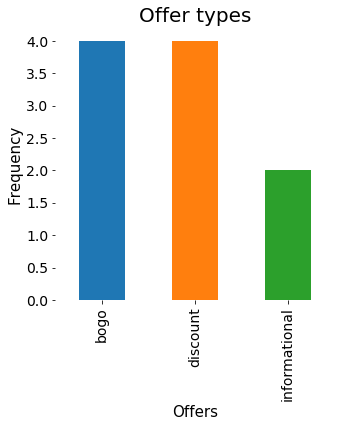

In [6]:
ax = portfolio["offer_type"].value_counts().plot.bar(
    figsize=(5,5),
    fontsize=14,

)
ax.set_title("Offer types", fontsize=20)
ax.set_xlabel("Offers", fontsize=15)
ax.set_ylabel("Frequency", fontsize=15)
sns.despine(bottom=True, left=True)

**Portfolio Datset does not have any null rows as indicated above in the attributes
**There are 3 types of offers
**Data set consists of 10 entries with the 'channels' column containing list of entries that needs to be cleaned

# Profile

In [7]:
# Data Exploration - Review dimensions of portfolio dataset
#Shape
print(profile.shape)

(17000, 5)


In [8]:
profile.head()

,age,became_member_on,gender,id,income
0,118,20170212,None,68be06ca386d4c31939f3a4f0e3dd783,NaN
1,55,20170715,F,0610b486422d4921ae7d2bf64640c50b,112000.0
2,118,20180712,None,38fe809add3b4fcf9315a9694bb96ff5,NaN
3,75,20170509,F,78afa995795e4d85b5d9ceeca43f5fef,100000.0
4,118,20170804,None,a03223e636434f42ac4c3df47e8bac43,NaN


In [9]:
df1 = profile[profile.isna().any(axis=1)]
df1.head()

,age,became_member_on,gender,id,income
0,118,20170212,None,68be06ca386d4c31939f3a4f0e3dd783,NaN
2,118,20180712,None,38fe809add3b4fcf9315a9694bb96ff5,NaN
4,118,20170804,None,a03223e636434f42ac4c3df47e8bac43,NaN
6,118,20170925,None,8ec6ce2a7e7949b1bf142def7d0e0586,NaN
7,118,20171002,None,68617ca6246f4fbc85e91a2a49552598,NaN


In [10]:

##import datetime
# Get latest date to calculate 'member_since' column
#enddate = profile['became_member_on'].max()

#date_obj = datetime.datetime.strptime(str(enddate), '%Y%m%d').date()
#profile['member_since'] = date_obj - pd.to_datetime(profile['became_member_on'], format='%Y%m%d').dt.date
#profile['member_since'] = profile['member_since'].dt.days

In [11]:
df1 = profile[profile.isna().any(axis=1)]
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 16994
Data columns (total 5 columns):
age                 2175 non-null int64
became_member_on    2175 non-null int64
gender              0 non-null object
id                  2175 non-null object
income              0 non-null float64
dtypes: float64(1), int64(2), object(2)
memory usage: 102.0+ KB


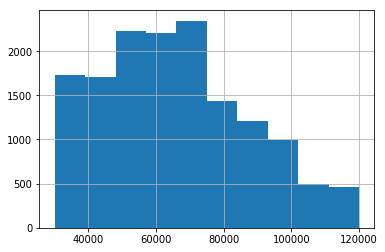

In [12]:
profile.income.hist()

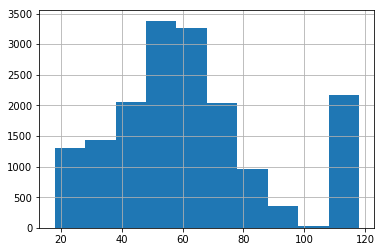

In [13]:
profile.age.hist()

** Cleanup of this data will be required as we see null values for age 118
- We have more people reporting income between 50,000 and 70,000
- High peak of members between age groups of 50 and 70

#  transcript 

In [14]:
display(transcript.head(5))

,event,person,time,value
0,offer received,78afa995795e4d85b5d9ceeca43f5fef,0,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'}
1,offer received,a03223e636434f42ac4c3df47e8bac43,0,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'}
2,offer received,e2127556f4f64592b11af22de27a7932,0,{'offer id': '2906b810c7d4411798c6938adc9daaa5'}
3,offer received,8ec6ce2a7e7949b1bf142def7d0e0586,0,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'}
4,offer received,68617ca6246f4fbc85e91a2a49552598,0,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'}


In [15]:
print(transcript.event.unique()) # 4 types of transactions found in transcript data

['offer received' 'offer viewed' 'transaction' 'offer completed']


In [16]:
transcript.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306534 entries, 0 to 306533
Data columns (total 4 columns):
event     306534 non-null object
person    306534 non-null object
time      306534 non-null int64
value     306534 non-null object
dtypes: int64(1), object(3)
memory usage: 9.4+ MB


** transcript does not contain any null values. However, during transformation and pre-processing, we will segregate the 'Offer id' to its own column 

# Data Preprocessing 
- Cleanup of profile,portfolio,and transcript Data sets
- Featured engineering : Convert 'became_member_on' field in portfolio dataset to days format and store it new column 'member_since'(which shows the # of days since the customer has been a member of Starbucks)
- Extract offer id into a separate column embedded in the values column of transcript dataset
- Join transcript and profile datasets based on person id after cleanup
- Join transcript and portfolio dataets based on offer id after cleanup
- For this project since the offer complete criteria is clear for BOGO and discount offers, I will only consider these two
datasets for modeling. I will not be considering informational offers for modeling and predicting offer complete
- As part of preprocessing, my thought is to term an offer complete(offer received -> offer viewed -> offer completed) based on the sequence of the records by person and offer id. For this purpose the code looks into the record prior and after for the events that happened
- Although Offer Complete is an event available in the dataset after the join with portfolio, it is not accurate as offer completed can be recorded even when customer did not really view the offer or was not under the influence of the offer
- My goal is to determine whether the offer was actually completed or not (meaning the sequence of events for BOGO and discounts datasets happened in the required sequence)
- Two columns Offer_Complete and Offer_Incomplete are determined based on the above logic and finally target variable 'offer label' is determined which will be used as a target in our models
- offer_label is made up of both completed and not completed offers for bogo and discount offer types





In [17]:
#Convert became_member_on from date to # of days since member so that it can be used as a feature later
# We are creating new column named member_since derived from column 'became_member_on' which stores the # of days"
#since a customer has been a member with Starbucks.Numeric value will be used as a feature in the models"
import datetime
# Creating new df cleaned_profile to hold records after cleaning
# Get latest date to calculate 'member_since' column
cleaned_profile = profile.copy()
enddate = cleaned_profile['became_member_on'].max()

date_obj = datetime.datetime.strptime(str(enddate), '%Y%m%d').date()
cleaned_profile['member_since'] = date_obj - pd.to_datetime(cleaned_profile['became_member_on'], format='%Y%m%d').dt.date
cleaned_profile['member_since'] = cleaned_profile['member_since'].dt.days
cleaned_profile.drop(['became_member_on'],axis = 1,inplace = True)

In [18]:
cleaned_profile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 5 columns):
age             17000 non-null int64
gender          14825 non-null object
id              17000 non-null object
income          14825 non-null float64
member_since    17000 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 664.1+ KB


** Records with customer's age as 118 cause null values in gender and income

** What we notice in the transcript dataset is having both offer_id and offer id in the value column.we will need to handle this while cleaning dataset

In [19]:
# Create copy of transcript file and extract offer_id as a separate column from value
# consider both 'offer_id' and 'offer id' in the value column"
cleaned_transcript = transcript.copy()

cleaned_transcript["offer_id"] = cleaned_transcript['value'].apply(lambda x: x['offer id'] if ('offer id' in x) else x['offer_id'] if ('offer_id' in x) else None)

In [20]:
#rename column 'id' to 'offer_id' to be merged with cleaned_portfolio 
#new df to hold portfolio records after transformation and cleaning
cleaned_portfolio = portfolio.copy()
cleaned_portfolio.rename(columns={'id':'offer_id'},inplace=True)

#join transcript with portfolio to get offer details
cleaned_transcript = cleaned_transcript.merge(cleaned_portfolio,how = 'left', on='offer_id')

In [21]:
cleaned_transcript.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 306534 entries, 0 to 306533
Data columns (total 10 columns):
event         306534 non-null object
person        306534 non-null object
time          306534 non-null int64
value         306534 non-null object
offer_id      167581 non-null object
channels      167581 non-null object
difficulty    167581 non-null float64
duration      167581 non-null float64
offer_type    167581 non-null object
reward        167581 non-null float64
dtypes: float64(3), int64(1), object(6)
memory usage: 25.7+ MB


** Tracking sequence of events by grouping records based on person and offer id.The events history - record prior and record after will be used to determine if an offer was actually completed after the offer was received and viewed

In [22]:
#We will use events history to track if offer received,offer viewed,and offer complete happenedv in the same sequen
cleaned_transcript['event1'],cleaned_transcript['event2'] = cleaned_transcript.groupby(['person','offer_id'])['event'].shift(2),cleaned_transcript.groupby(['person','offer_id'])['event'].shift(1)
cleaned_transcript.reset_index()
cleaned_transcript.sort_values(['person','offer_id','time'])

,event,person,time,value,offer_id,channels,difficulty,duration,offer_type,reward,event1,event2
247879,offer received,0009655768c64bdeb2e877511632db8f,576,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},2906b810c7d4411798c6938adc9daaa5,"[web, email, mobile]",10.0,7.0,discount,2.0,NaN,NaN
258884,offer completed,0009655768c64bdeb2e877511632db8f,576,{'offer_id': '2906b810c7d4411798c6938adc9daaa5...,2906b810c7d4411798c6938adc9daaa5,"[web, email, mobile]",10.0,7.0,discount,2.0,NaN,offer received
113605,offer received,0009655768c64bdeb2e877511632db8f,336,{'offer id': '3f207df678b143eea3cee63160fa8bed'},3f207df678b143eea3cee63160fa8bed,"[web, email, mobile]",0.0,4.0,informational,0.0,NaN,NaN
139992,offer viewed,0009655768c64bdeb2e877511632db8f,372,{'offer id': '3f207df678b143eea3cee63160fa8bed'},3f207df678b143eea3cee63160fa8bed,"[web, email, mobile]",0.0,4.0,informational,0.0,NaN,offer received
55972,offer received,0009655768c64bdeb2e877511632db8f,168,{'offer id': '5a8bc65990b245e5a138643cd4eb9837'},5a8bc65990b245e5a138643cd4eb9837,"[email, mobile, social]",0.0,3.0,informational,0.0,NaN,NaN
77705,offer viewed,0009655768c64bdeb2e877511632db8f,192,{'offer id': '5a8bc65990b245e5a138643cd4eb9837'},5a8bc65990b245e5a138643cd4eb9837,"[email, mobile, social]",0.0,3.0,informational,0.0,NaN,offer received
153401,offer received,0009655768c64bdeb2e877511632db8f,408,{'offer id': 'f19421c1d4aa40978ebb69ca19b0e20d'},f19421c1d4aa40978ebb69ca19b0e20d,"[web, email, mobile, social]",5.0,5.0,bogo,5.0,NaN,NaN
168413,offer completed,0009655768c64bdeb2e877511632db8f,414,{'offer_id': 'f19421c1d4aa40978ebb69ca19b0e20d...,f19421c1d4aa40978ebb69ca19b0e20d,"[web, email, mobile, social]",5.0,5.0,bogo,5.0,NaN,offer received
187554,offer viewed,0009655768c64bdeb2e877511632db8f,456,{'offer id': 'f19421c1d4aa40978ebb69ca19b0e20d'},f19421c1d4aa40978ebb69ca19b0e20d,"[web, email, mobile, social]",5.0,5.0,bogo,5.0,offer received,offer completed
204340,offer received,0009655768c64bdeb2e877511632db8f,504,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},fafdcd668e3743c1bb461111dcafc2a4,"[web, email, mobile, social]",10.0,10.0,discount,2.0,NaN,NaN


In [23]:
#An offer is treated actually complete and we will flag it when it follows the sequence of  'Offer_received' --> 'offer_viewed' --> 'offer_completed'
cleaned_transcript['offer_complete']=np.where((cleaned_transcript['event1'] == "offer received") & (cleaned_transcript['event2'] == "offer viewed") & (cleaned_transcript['event'] == "offer completed"),1,0)

In [24]:
cleaned_transcript[cleaned_transcript['offer_complete']==1].shape

(23267, 13)

In [25]:
# We will consider the dataset for BOGO and Discount Offer types to prepare our dataset for modeling
bogo_discount_type = cleaned_transcript.query("offer_type == 'bogo' | offer_type == 'discount'")
#print(bogo_discount_type.offer_id.unique())
bogo_discount_type[bogo_discount_type['offer_complete']==1].shape


(23267, 13)

In [26]:
bogo_discount_type['event3'] = bogo_discount_type.groupby(['person','offer_id'])['event'].shift(-1)
bogo_discount_type.reset_index()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,index,event,person,time,value,offer_id,channels,difficulty,duration,offer_type,reward,event1,event2,offer_complete,event3
0,0,offer received,78afa995795e4d85b5d9ceeca43f5fef,0,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},9b98b8c7a33c4b65b9aebfe6a799e6d9,"[web, email, mobile]",5.0,7.0,bogo,5.0,NaN,NaN,0,offer viewed
1,1,offer received,a03223e636434f42ac4c3df47e8bac43,0,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0b1e1539f2cc45b7b9fa7c272da2e1d7,"[web, email]",20.0,10.0,discount,5.0,NaN,NaN,0,offer viewed
2,2,offer received,e2127556f4f64592b11af22de27a7932,0,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},2906b810c7d4411798c6938adc9daaa5,"[web, email, mobile]",10.0,7.0,discount,2.0,NaN,NaN,0,offer viewed
3,3,offer received,8ec6ce2a7e7949b1bf142def7d0e0586,0,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},fafdcd668e3743c1bb461111dcafc2a4,"[web, email, mobile, social]",10.0,10.0,discount,2.0,NaN,NaN,0,offer viewed
4,4,offer received,68617ca6246f4fbc85e91a2a49552598,0,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},4d5c57ea9a6940dd891ad53e9dbe8da0,"[web, email, mobile, social]",10.0,5.0,bogo,10.0,NaN,NaN,0,offer viewed
5,5,offer received,389bc3fa690240e798340f5a15918d5c,0,{'offer id': 'f19421c1d4aa40978ebb69ca19b0e20d'},f19421c1d4aa40978ebb69ca19b0e20d,"[web, email, mobile, social]",5.0,5.0,bogo,5.0,NaN,NaN,0,offer viewed
6,6,offer received,c4863c7985cf408faee930f111475da3,0,{'offer id': '2298d6c36e964ae4a3e7e9706d1fb8c2'},2298d6c36e964ae4a3e7e9706d1fb8c2,"[web, email, mobile, social]",7.0,7.0,discount,3.0,NaN,NaN,0,offer viewed
7,8,offer received,aa4862eba776480b8bb9c68455b8c2e1,0,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0b1e1539f2cc45b7b9fa7c272da2e1d7,"[web, email]",20.0,10.0,discount,5.0,NaN,NaN,0,offer viewed
8,9,offer received,31dda685af34476cad5bc968bdb01c53,0,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0b1e1539f2cc45b7b9fa7c272da2e1d7,"[web, email]",20.0,10.0,discount,5.0,NaN,NaN,0,offer viewed
9,10,offer received,744d603ef08c4f33af5a61c8c7628d1c,0,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0b1e1539f2cc45b7b9fa7c272da2e1d7,"[web, email]",20.0,10.0,discount,5.0,NaN,NaN,0,offer viewed


In [27]:
#An offer is treated not complete or not under the influence when it folllows the sequence of  'Offer_received' --> 'offer_viewed' WITHOUT 'offer_completed'
# We will only consider records with event 'offer completed' for the next phase of modeling as these are the records that are tagged with 'actual complete'
# For customers that did not complete the offer, we check for events history 'offer received' -> 'offer viewed' and if there is no 'Offer completed', we tag the records as 'not complete'

bogo_discount_type['offer_incomplete']=np.where((bogo_discount_type['event'] == "offer viewed") & (bogo_discount_type['event3'] != "offer completed"),1,0)
                                             
 

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [28]:
#Sampling records where offer is not completed since sequence of events was not followed
bogo_discount_type[bogo_discount_type['offer_incomplete']==1].head()

,event,person,time,value,offer_id,channels,difficulty,duration,offer_type,reward,event1,event2,offer_complete,event3,offer_incomplete
12653,offer viewed,02c083884c7d45b39cc68e1314fec56c,0,{'offer id': 'ae264e3637204a6fb9bb56bc8210ddfd'},ae264e3637204a6fb9bb56bc8210ddfd,"[email, mobile, social]",10.0,7.0,bogo,10.0,NaN,offer received,0,NaN,1
12661,offer viewed,e528ceb341964128aaf58a59733ec2af,0,{'offer id': '2298d6c36e964ae4a3e7e9706d1fb8c2'},2298d6c36e964ae4a3e7e9706d1fb8c2,"[web, email, mobile, social]",7.0,7.0,discount,3.0,NaN,offer received,0,offer received,1
12662,offer viewed,262ad0fb526a4d53b572007da60cce24,0,{'offer id': 'f19421c1d4aa40978ebb69ca19b0e20d'},f19421c1d4aa40978ebb69ca19b0e20d,"[web, email, mobile, social]",5.0,5.0,bogo,5.0,NaN,offer received,0,offer received,1
12664,offer viewed,182e68952b474700b171e21b85c258ac,0,{'offer id': 'f19421c1d4aa40978ebb69ca19b0e20d'},f19421c1d4aa40978ebb69ca19b0e20d,"[web, email, mobile, social]",5.0,5.0,bogo,5.0,NaN,offer received,0,offer received,1
12668,offer viewed,c099206f76b1414db7552f163520053c,0,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},9b98b8c7a33c4b65b9aebfe6a799e6d9,"[web, email, mobile]",5.0,7.0,bogo,5.0,NaN,offer received,0,NaN,1


In [29]:
# We consider BOGO and Discount type offers which have 'offer_complete' set to 1(which means offer was complete) and 'offer_incomplete'
# set to 1 which means offer was not completed
bogo_discount_df = bogo_discount_type[(bogo_discount_type["offer_complete"] == 1 ) | (bogo_discount_type["offer_incomplete"] == 1)].copy()

In [30]:
# Create column 'offer_label' , binary in nature which holds whether an offer was truly complete or not
# Later this column will be used as target in our modeling phase to predict whether an offer will be completed or not
# I have considered a total dataset comprising of bogo and discount offers, 2 separate sets individually for bogo and discount to test the models
bogo_discount_df['offer_label']=np.where((bogo_discount_df['offer_complete'] == 1),bogo_discount_df['offer_complete'],0)
bogo_only_df = bogo_discount_df.query("offer_type == 'bogo'")
discount_only_df =  bogo_discount_df.query("offer_type == 'discount'")

In [31]:
bogo_discount_df.shape

(46879, 16)

In [32]:
#drop columns which are not required when considering features
bogo_discount_df.drop(['value','event1','event2','event3','offer_complete','offer_incomplete','offer_type','time'],axis = 1,inplace = True)
bogo_only_df.drop(['value','event1','event2','event3','offer_complete','offer_incomplete','offer_type','time'],axis = 1,inplace = True)
discount_only_df.drop(['value','event1','event2','event3','offer_complete','offer_incomplete','offer_type','time'],axis = 1,inplace = True)


/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [34]:
#Check if the dataset we are considering for modeling still has null records
df1 = bogo_discount_df[bogo_discount_df.isna().any(axis=1)]
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 8 columns):
event          0 non-null object
person         0 non-null object
offer_id       0 non-null object
channels       0 non-null object
difficulty     0 non-null float64
duration       0 non-null float64
reward         0 non-null float64
offer_label    0 non-null int64
dtypes: float64(3), int64(1), object(4)
memory usage: 0.0+ bytes


# Preparing Dataset for modeling

-Encode categorical data such as gender, offer type, channel and age groups.
-Fill null values of age and income with respective mean values so that there is no unnecessary bias created in the dataset
which could also sometimes lead to overfitting of the model

-Fill null values of gender with mode or commonly found value in the gender column. This is done again so that records  
deleted do not cause bias or overfitting of the model

-Separate the channel and gender columns into separate column using one-hot-encoding

-normalize numerical data so that mumerical data are adjusted to common scale

-We will scale 'difficulty','duration','reward','income','member_since','age' columns

In [35]:
# Merge with Profile Data
#rename column
def data_prep(df):
    '''
    inputs:
    - df: input dataframe to undergo cleansing and processing 
    
    outputs:
    - Returns prepared dataframe(df) for modeling after columns undergo hot encoding and merging of dataset
    '''
    # Join data with profile and pass it to data_prep function
    cleaned_profile.rename(columns={'id':'person'},inplace=True)
    df = df.merge(cleaned_profile,how='left', on='person' )

    #process categorical variables
    # One-hot encode channels column
    # https://stackoverflow.com/questions/18889588/create-dummies-from-column-with-multiple-values-in-pandas
    channels_code = df["channels"].str.join(sep="*").str.get_dummies(sep="*")
    
    # Replace age 118 with mean age so we do not lose the records
    df.loc[df['age'] == 118, 'age'] = df['age'].mean()
    mode = df['gender'].mode()[0]
    df['gender'] = df['gender'].fillna(mode)
    
    #Replace income na values with mean so that we do not lose the records by dropping
    # I have taken this approach of not deleting the records so that when they are merged with the transcript dataset, if
    # there are transactions against this person id, we have valid profile info
    df['income'] = df['income'].fillna(df['income'].mean())

       
     # One-hot encode Gender column
    gender_code = pd.get_dummies(df["gender"])
    
    
     # Concat
    df = pd.concat([df, channels_code,gender_code], axis=1,sort=False)
    
     # drop columns - gender and channels    
    df.drop(['gender','channels'],axis = 1,inplace = True)
    return df


In [36]:
#Preparing 3 dataets to test in modelling phase - transformed dataset(Contains both bogo and discont records)
# bogo_only_dataset(contains only bogo records) and discount_only_dataset ( contians only discount records)
combined_df = data_prep(bogo_discount_df)
bogo_df = data_prep(bogo_only_df)
discount_df = data_prep(discount_only_df)
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46879 entries, 0 to 46878
Data columns (total 17 columns):
event           46879 non-null object
person          46879 non-null object
offer_id        46879 non-null object
difficulty      46879 non-null float64
duration        46879 non-null float64
reward          46879 non-null float64
offer_label     46879 non-null int64
age             46879 non-null float64
income          46879 non-null float64
member_since    46879 non-null int64
email           46879 non-null int64
mobile          46879 non-null int64
social          46879 non-null int64
web             46879 non-null int64
F               46879 non-null uint8
M               46879 non-null uint8
O               46879 non-null uint8
dtypes: float64(5), int64(6), object(3), uint8(3)
memory usage: 5.5+ MB


# Exploratory analysis on merged datasets
- we will plot charts based on features such as age,gender,and income against the new offer_label column to get an idea of how these features relate to offer complete
- For exploratory analysis, I have considered age and income buckets

In [37]:
df_eda = combined_df.copy()
 # Creating additional columns to df_eda dataframe for exploratory analysis    
 # Specifying age range and one hot encoding
        
range_ages = pd.cut(x=df_eda["age"], bins=[18, 20, 29, 39, 49, 59, 69, 79, 89, 99, 102])
    
# One-hot encode ages column
ages_code = pd.get_dummies(range_ages)
    
# Specifying income range and one hot encoding
   
range_income = pd.cut(x=df_eda["income"], bins=[30000, 40000, 50000, 60000, 70000, 80000, 90000, 100000, 110000,  120000])
income_code = pd.get_dummies(range_income)
  
# Concat
df_eda = pd.concat([df_eda, ages_code,income_code], axis=1,sort=False)
    
# drop columns - gender and channels    
df_eda.drop(['age','income'],axis = 1,inplace = True)

offer_completed = df_eda.query("offer_label == 1")

In [38]:
 # Rename columns on final transcript.
columns_names = ['event','person','offer_id','difficulty','duration','reward','offer_label','member_since', 
'email', 'mobile', 'social', 'web','F', 'M', 'O',"18-20", "20-29", "29-39", "39-49", "49-59", "59-69", "69-79", "79-89", "89-99", "99-102", "30-40K", "40-50K", "50-60K",
"60-70K", "70-80K", "80-90K", "90-100K", "100-110K", "110-120K"]
df_eda.columns = columns_names
df_eda.head()

,event,person,offer_id,difficulty,duration,reward,offer_label,member_since,email,mobile,...,99-102,30-40K,40-50K,50-60K,60-70K,70-80K,80-90K,90-100K,100-110K,110-120K
0,offer viewed,02c083884c7d45b39cc68e1314fec56c,ae264e3637204a6fb9bb56bc8210ddfd,10.0,7.0,10.0,0,745,1,1,...,0,0,0,0,0,0,0,0,0,0
1,offer completed,9fa9ae8f57894cc9a3b8a9bbe0fc1b2f,2906b810c7d4411798c6938adc9daaa5,10.0,7.0,2.0,1,921,1,1,...,0,0,0,0,0,0,0,1,0,0
2,offer viewed,e528ceb341964128aaf58a59733ec2af,2298d6c36e964ae4a3e7e9706d1fb8c2,7.0,7.0,3.0,0,27,1,1,...,0,1,0,0,0,0,0,0,0,0
3,offer viewed,262ad0fb526a4d53b572007da60cce24,f19421c1d4aa40978ebb69ca19b0e20d,5.0,5.0,5.0,0,149,1,1,...,0,0,0,1,0,0,0,0,0,0
4,offer viewed,182e68952b474700b171e21b85c258ac,f19421c1d4aa40978ebb69ca19b0e20d,5.0,5.0,5.0,0,337,1,1,...,0,0,0,0,1,0,0,0,0,0


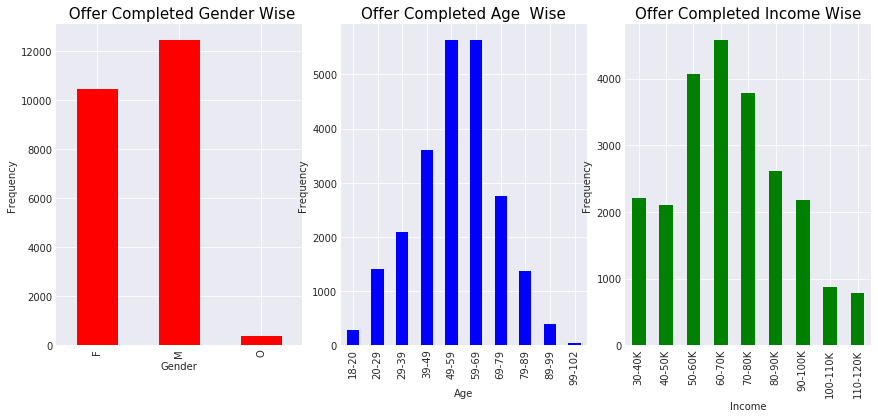

In [39]:
#plot graphs based on age,income and gender
sns.set_style('darkgrid')
fig,ax= plt.subplots(1,3,figsize=(12,5))
fig.tight_layout()


# GENDER BASED
df_eda[df_eda['offer_label']==1][['F','M','O']].sum().plot.bar(ax=ax[0],fontsize=10,color='red') 
ax[0].set_title(" Offer Completed Gender Wise", fontsize=15,color='black')
ax[0].set_xlabel("Gender", fontsize=10)
ax[0].set_ylabel("Frequency", fontsize=10)
sns.despine(bottom=True, left=True)

# AGE BASED
age_cols=['18-20','20-29', '29-39', '39-49', '49-59', '59-69', '69-79', '79-89', '89-99','99-102']
df_eda[df_eda['offer_label']==1][age_cols].sum().plot.bar(ax=ax[1],fontsize=10,color='blue') 
ax[1].set_title("Offer Completed Age  Wise", fontsize=15,color='black')
ax[1].set_xlabel("Age", fontsize=10)
ax[1].set_ylabel("Frequency", fontsize=10)
sns.despine(bottom=True, left=True)

# INCOME BASED
income_cols=['30-40K', '40-50K', '50-60K', '60-70K','70-80K', '80-90K', '90-100K', '100-110K','110-120K']
df_eda[df_eda['offer_label']==1][income_cols].sum().plot.bar(ax=ax[2],fontsize=10,color='green') 
ax[2].set_title("Offer Completed Income Wise", fontsize=15,color='black')
ax[2].set_xlabel("Income", fontsize=10)
ax[2].set_ylabel("Frequency", fontsize=10)
sns.despine(bottom=True, left=True)
plt.show()

In [42]:
df1 = combined_df[combined_df.isna().any(axis=1)] # Test for null values before useing df in modeling
df1.head()

,event,person,offer_id,difficulty,duration,reward,offer_label,age,income,member_since,email,mobile,social,web,F,M,O


# Implementation
# Identified features :
'difficulty
'duration'
'reward'
'age'
'income'
'member_since'
'email'
'mobile'
'social'
'web'
'F'
'M'
'O'
#target : offer_label
- 3 datasets are considered as discussed earlier to test our model : Complete dataset containing bogo and discount offers, only bogo offer,only dicount offers
- 3 classifiers are used for predicting if a customer will complete an offer or not namely Decision Tree classifier,Random Tree
classifier and Logistic Regression.
-Logistic Regression is our benchmark model and we will evaluate the performance of the other 2 models against the Logistic Regression Model and make a recommendation
- We will apply normalization (min-max scaling technique) to scale the features
-Gradient descent based algorithms such as Logistic regression require scaling of features so that they are of the same magnitude and converge smoothly,reducing error between predicted and actual values
-Tree based algorithms such as Random Forest are not necessarily impacted with scaling and most likely perform similar with and without scaling



In [43]:
features_set_total = combined_df[combined_df.columns[3:]]
target_total = combined_df['offer_label']
features_set_total.drop('offer_label',axis=1,inplace=True)

# Repeat steps for bogo only set
features_set_bogo = bogo_df[bogo_df.columns[3:]]
target_bogo = bogo_df['offer_label']
features_set_bogo.drop('offer_label',axis=1,inplace=True)

# Repeat steps for discount only set
features_set_discount = discount_df[discount_df.columns[3:]]
target_discount = discount_df['offer_label']
features_set_discount.drop('offer_label',axis=1,inplace=True)




/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


# Normalize Numerical Features

In [44]:
from sklearn.preprocessing import MinMaxScaler
def scale_data(features):
    '''
    inputs:
    - features dataframe 
    
    outputs:
    - Oututs features_final df which is a scaled version of the features df
   
    '''
    # Initialize a scaler, then apply it to the features
    scaler = MinMaxScaler() # default=(0, 1)
    numericals = ['difficulty','duration','reward','income','member_since','age']

    features_df = pd.DataFrame(data = features)
    features_df[numericals] = scaler.fit_transform(features[numericals])


    # Show an example of a record with scaling applied
    features_final = features_df.copy()
    return features_final


In [45]:
# Splitting dataset
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
def data_split(features,target):
    '''
    inputs:
    - features & target dataframe 
    
    outputs:
    - Splits features and target dataframe to train and test sets, performs feature scaling on both datasets.
    - Outputs X_train, X_test, y_train and y_test dataframes
    '''

    #fit and transform scaling on training data
   
    # Split the 'features' and 'income' data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(features, 
                                                    target, 
                                                    test_size = 0.20, 
                                                    random_state = 42,
                                                   stratify=target)
    #stratify=target
    scaler =  MinMaxScaler()
    
    X_train=scaler.fit_transform(X_train)

    #scale test data
    X_test=scaler.transform(X_test)
    
    # Display result after splitting..
    print("results of the split\n------")
    print("Training set has {} samples.".format(X_train.shape[0]))
    print("Testing set has {} samples.".format(X_test.shape[0]))

    print("\nclass distribution\n------")
    print('y_train class distribution')
    print(y_train.value_counts(normalize=True))
    print('y_test class distribution')
    print(y_test.value_counts(normalize=True))
    return X_train, X_test, y_train, y_test

In [46]:
from sklearn.metrics import mean_squared_error
def train_predict(learner, X_train, y_train, X_test, y_test): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: review_scores_rating training set
       - X_test: features testing set
       - y_test: review_scores_rating testing set
    '''
    results = {}
    
    #Fit the learner to the training data and get training time
    start = time() 
    learner = learner.fit(X_train, y_train)
    end = time() 
    results['train_time'] = end-start
    
    
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train)
   
         
    #add training accuracy to results
    results['training_score']=learner.score(X_train,y_train)
    
    #add testing accuracy to results
    results['testing_score']=learner.score(X_test,y_test)
     
    print("{} trained on {} samples.".format(learner.__class__.__name__, len(y_train)))
    print("Training accuracy:%.4f" % results['training_score'])
    print("Test accuracy:%.4f" % results['testing_score'])
    print(classification_report(y_test, predictions_test,digits=4))
    tn, fp, fn, tp = conf_mtx = confusion_matrix(y_test, predictions_test).ravel()
    con_mtx = np.array([[tp, fn],[fp, tn]])

    # Confusion Matrix visualization
    plot_confusion_matrix(cm           = con_mtx, 
                      normalize    = False,
                      target_names = ['positive', 'negative'],
                      title        = "Confusion Matrix")
    return results

In [47]:

import matplotlib.pyplot as plt 
def test_model(clf_A,clf_B,clf_C):
    '''
    inputs:
    - clf_A: first classifier model
    - clf_B: second classifier model for comparison
    - clf_C: third classifier model for comparison
    
    
    outputs:
    - Dataframe of results from model training and prediction
    '''
    # Collect results on the learners
    results = {}
    for clf in [clf_A,clf_B,clf_C]:
        clf_name = clf.__class__.__name__ + '_' +'BOGO_Discount'
        results[clf_name] = {}
        results[clf_name]= train_predict(clf, X_train, y_train, X_test, y_test)
    return pd.DataFrame(results)     

In [48]:
# Reference https://www.kaggle.com/grfiv4/plot-a-confusion-matrix
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Reference
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()


# Model evaluation
- We will test the data against 3 different models and evaluate the performance
- Logistic Regression is our benchmark model.We have considered Decision Tree and Random Forest classifiers as the other 2 models to predict whether the customer will complete the offer or not
- 3 datsets are considered - BOGO only,Discount only and a combination of both to guage performance of the model
- For this project,I have not considered the informational offers as they do not have a clear set path to measure offer completeness
- A confusion matrix is plotted for each of the datasets which gives us an idea on how the model is performing against false positives and false negatives (precision and recall) which are important metrics to evaluate the performance of the models other than accuracy
- Finally we apply model tuning to optimize the model - In this case I have applied the model tuning to the combined dataset(bogo + discount)

# Test BOGO only dataset

results of the split
------
Training set has 20359 samples.
Testing set has 5090 samples.

class distribution
------
y_train class distribution
0    0.570067
1    0.429933
Name: offer_label, dtype: float64
y_test class distribution
0    0.570138
1    0.429862
Name: offer_label, dtype: float64
DecisionTreeClassifier trained on 20359 samples.
Training accuracy:0.6979
Test accuracy:0.7006
             precision    recall  f1-score   support

          0     0.7559    0.7012    0.7276      2902
          1     0.6384    0.6997    0.6677      2188

avg / total     0.7054    0.7006    0.7018      5090



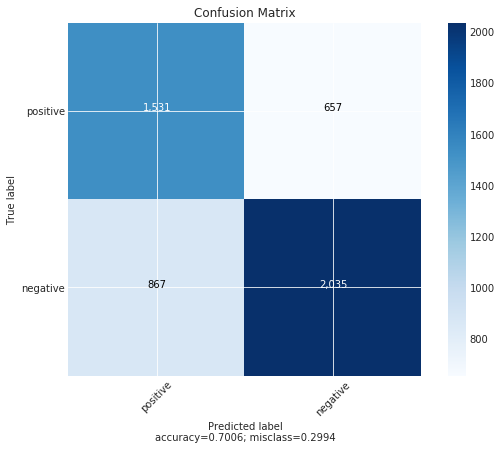

LogisticRegression trained on 20359 samples.
Training accuracy:0.6514
Test accuracy:0.6360
             precision    recall  f1-score   support

          0     0.6532    0.7705    0.7070      2902
          1     0.6005    0.4575    0.5193      2188

avg / total     0.6306    0.6360    0.6263      5090



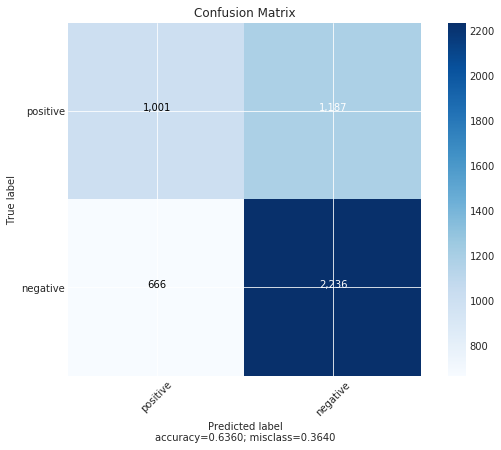

RandomForestClassifier trained on 20359 samples.
Training accuracy:0.7318
Test accuracy:0.7020
             precision    recall  f1-score   support

          0     0.7323    0.7522    0.7421      2902
          1     0.6591    0.6353    0.6470      2188

avg / total     0.7008    0.7020    0.7012      5090



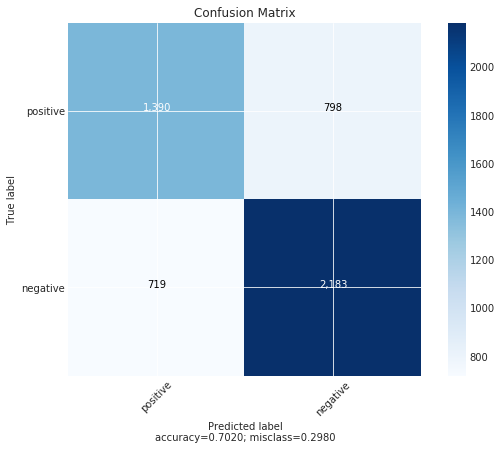

In [49]:
#  Scale Features
features_scaled = scale_data(features_set_bogo)

# Split Test Train Dataset
X_train, X_test, y_train, y_test = data_split(features_set_bogo,target_bogo)
#Initialize the model - baseline is DT model, bogo_1 model is RF model
#  Initializing the three models
dtc = DecisionTreeClassifier(criterion='entropy',max_depth=5,random_state=2,min_samples_split=90,min_samples_leaf=50) #DecisionTree
benchmark = LogisticRegression() #Logistic Regression
# n_estimators=10 is a default parameter. Necessary for not error message. 
rfc = RandomForestClassifier(random_state=2,max_depth= 11, max_features= 'auto',min_samples_split= 10,n_estimators=20,min_samples_leaf=20)#EnsembleMethods 
results=test_model(dtc,benchmark,rfc)

# Test discount only dataset

results of the split
------
Training set has 17144 samples.
Testing set has 4286 samples.

class distribution
------
y_train class distribution
1    0.575187
0    0.424813
Name: offer_label, dtype: float64
y_test class distribution
1    0.575128
0    0.424872
Name: offer_label, dtype: float64
DecisionTreeClassifier trained on 17144 samples.
Training accuracy:0.7032
Test accuracy:0.6885
             precision    recall  f1-score   support

          0     0.6401    0.6096    0.6245      1821
          1     0.7214    0.7469    0.7339      2465

avg / total     0.6869    0.6885    0.6874      4286



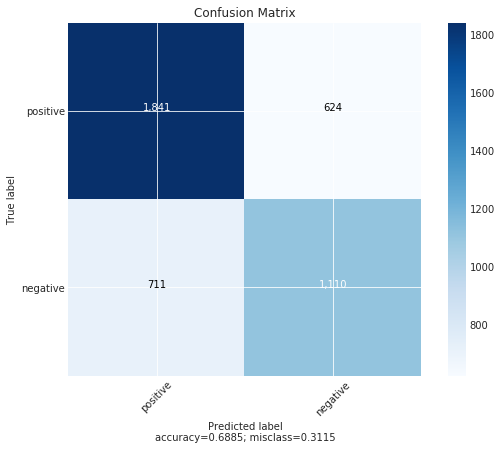

LogisticRegression trained on 17144 samples.
Training accuracy:0.6641
Test accuracy:0.6636
             precision    recall  f1-score   support

          0     0.6178    0.5459    0.5796      1821
          1     0.6911    0.7505    0.7196      2465

avg / total     0.6599    0.6636    0.6601      4286



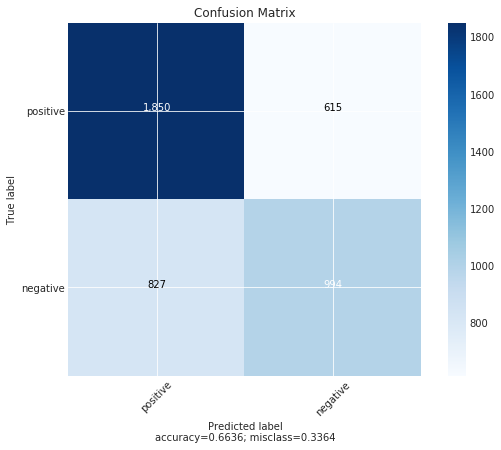

RandomForestClassifier trained on 17144 samples.
Training accuracy:0.7311
Test accuracy:0.6876
             precision    recall  f1-score   support

          0     0.6468    0.5832    0.6133      1821
          1     0.7129    0.7647    0.7379      2465

avg / total     0.6848    0.6876    0.6850      4286



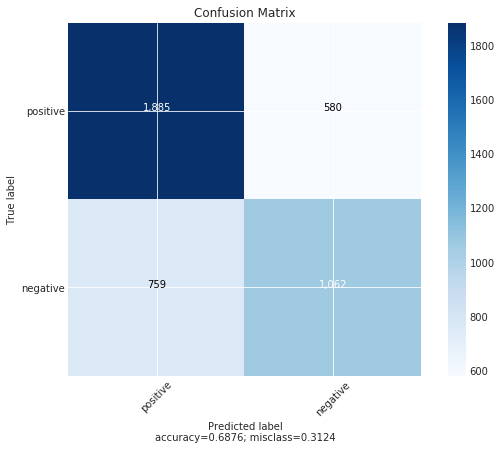

In [50]:

# Scale Features
features_scaled = scale_data(features_set_discount)
# Split Test Train Dataset
X_train, X_test, y_train, y_test = data_split(features_set_discount,target_discount)
#Initialize the model - baseline is DT model, bogo_1 model is RF model
#  Initializing the three models
dtc = DecisionTreeClassifier(criterion='entropy',max_depth=5,random_state=2,min_samples_split=90,min_samples_leaf=50) #DecisionTree
benchmark = LogisticRegression() #Logistic Regression
# n_estimators=10 is a default parameter. Necessary for not error message. 
rfc = RandomForestClassifier(random_state=2,max_depth= 11, max_features= 'auto',min_samples_split= 10,n_estimators=20,min_samples_leaf=20)#EnsembleMethods 
results=test_model(dtc,benchmark,rfc)

# Test combined(BOGO+Discount) dataset

results of the split
------
Training set has 37503 samples.
Testing set has 9376 samples.

class distribution
------
y_train class distribution
0    0.503666
1    0.496334
Name: offer_label, dtype: float64
y_test class distribution
0    0.503733
1    0.496267
Name: offer_label, dtype: float64
DecisionTreeClassifier trained on 37503 samples.
Training accuracy:0.6970
Test accuracy:0.6943
             precision    recall  f1-score   support

          0     0.7176    0.6483    0.6812      4723
          1     0.6749    0.7410    0.7064      4653

avg / total     0.6964    0.6943    0.6937      9376



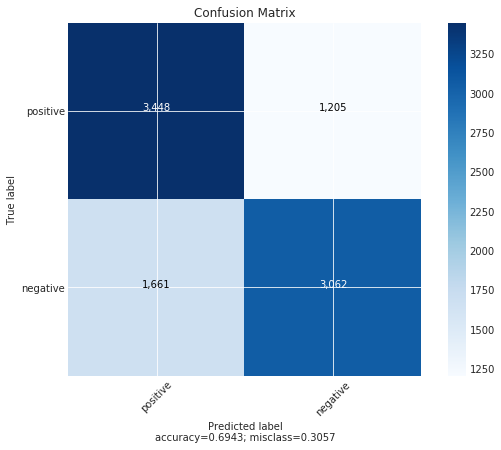

LogisticRegression trained on 37503 samples.
Training accuracy:0.6459
Test accuracy:0.6404
             precision    recall  f1-score   support

          0     0.6356    0.6703    0.6525      4723
          1     0.6457    0.6099    0.6273      4653

avg / total     0.6406    0.6404    0.6400      9376



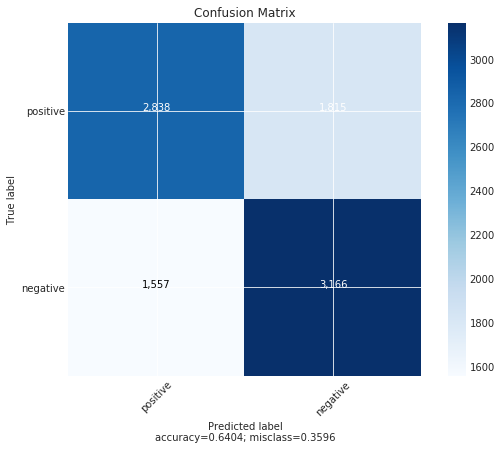

RandomForestClassifier trained on 37503 samples.
Training accuracy:0.7280
Test accuracy:0.6993
             precision    recall  f1-score   support

          0     0.7019    0.7008    0.7013      4723
          1     0.6968    0.6978    0.6973      4653

avg / total     0.6993    0.6993    0.6993      9376



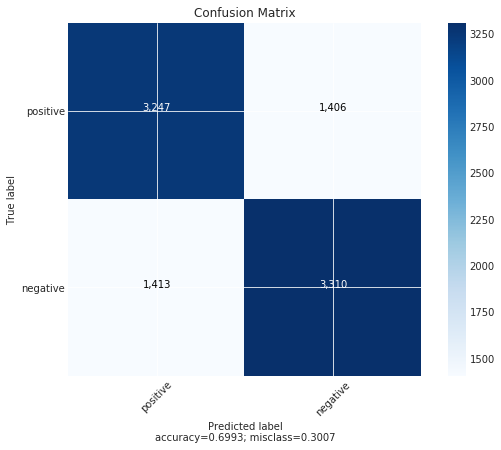

In [51]:

# Scale Features
features_scaled = scale_data(features_set_total)
# Split Test Train Dataset
X_train, X_test, y_train, y_test = data_split(features_set_total,target_total)
#Initialize the model - baseline is DT model, bogo_1 model is RF model
#  Initializing the three models
dtc = DecisionTreeClassifier(criterion='entropy',max_depth=5,random_state=2,min_samples_split=90,min_samples_leaf=50) #DecisionTree
benchmark = LogisticRegression() #Logistic Regression
# n_estimators=10 is a default parameter. Necessary for not error message. 
rfc = RandomForestClassifier(random_state=2,max_depth= 11, max_features= 'auto',min_samples_split= 10,n_estimators=20,min_samples_leaf=20)#EnsembleMethods 
results=test_model(dtc,benchmark,rfc)

# Apply GridSearchCV to optimize the model

In [52]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score
from sklearn.metrics import fbeta_score, accuracy_score, f1_score
#  Initialize the classifier
clf = RandomForestClassifier(random_state =42, n_estimators=20)

# Create the parameters list you wish to tune, using a dictionary if needed.
parameters = {'max_features':['auto', 'sqrt'], 'min_samples_leaf':[2,4,6,8,10], 'min_samples_split':[2,4,6,8,10]} 

#  Make an fbeta_score scoring object using make_scorer()
beta= 0.01
#scorer = make_scorer(fbeta_score, beta=beta)
scorer = make_scorer(precision_score)

#  Perform grid search on the classifier using 'scorer' as the scoring method using GridSearchCV()
grid_obj = GridSearchCV(clf, parameters, cv=3, scoring=scorer)

# TODO: Fit the grid search object to the training data and find the optimal parameters using fit()
grid_fit = grid_obj.fit(X_train, y_train)

# Get the estimator
best_clf = grid_fit.best_estimator_

# Make predictions using the unoptimized and model
predictions = (clf.fit(X_train, y_train)).predict(X_test)
best_predictions = best_clf.predict(X_test)

# Report the before-and-afterscores
print("Unoptimized model\n------")
print("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = beta)))
print("\nOptimized Model\n------")
print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = beta)))

Unoptimized model
------
Accuracy score on testing data: 0.6660
F-score on testing data: 0.6659

Optimized Model
------
Final accuracy score on the testing data: 0.6937
Final F-score on the testing data: 0.6874


# Results & Conclusion
- We tested our models against 3 datsets;
- With each of the datsets - bogo,discount,& combined(bogo+discount),we observe the following
    - Decision Tree and Random Forest classifiers perform better than the benchmark model Logistic Regression
    - For bogo dataset, we had 5090 test samples
     - We have decision tree and Random forest produce about 70% accuracy and 70% f1-score where as logistic regression is around 64% for  accuracy and 62% for f1-score
    
    - For discount, we had 4286 test samples
     - We have decision tree and Random forest produce about 69% accuracy and 69% f1-score where as logistic regression is around 66% for both accuracy and f1-score
    
    - For the combined dataset, we had 9376 test samples
       - We have decision tree and Random forest produce about 70% accuracy and 70% f1-score where as logistic regression is around 64% for both accuracy and f1-score
- We can definitively suggest using either the decision tree or the Random Forest classifier as the recommended model based on the results. They both have a fairly decent accuracy,precion,recall, and f1-score to gauge the performance of the model.
-A decent precison and recall also shows low false positves and low false negatives which means when a model predicts than an offer will completed based on the features, it stands a better chance to be true and same is the case when the model predicts that an offer will not be completed.

# Feature Importance

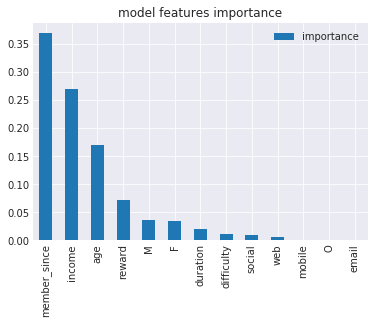

In [53]:
# Applying deature importance on the optimized model obtained after GridSearchCV
model = best_clf.fit(X_train, y_train)
feature_importances = pd.DataFrame(model.feature_importances_,
                                   index = features_set_total.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)
feature_importances.plot.bar()
plt.title('model features importance')
plt.show()

# Reflection
- We find by plotting the feature importance that 'member_since','income', and 'age' are the top 3 features with the highest weightage.'member_since' was a new column added as part of feature engineering based on 'became_member_on' date column
- After evaluating the model results and looking at the feature importance results, I am convinced that the models suggested in this project can be used to predict if an offer would be completed or not.

I started this project with ceratin goals as stated in the problem statement of my proposal:

    • Predict the response to an offer - If the consumer will complete an offer or not?
    
    • Measure the accuracy of the model, precision, and F1-Score
    
    • Explore which input parameters/features play a critical role in predicting whether the customer will take the offer or not.
    
  
I believe the answers to the above questions have been answered to my satisfaction with compelling statistics and results.  

The Udacity Data Scientist Nanodegree program has been a rewarding experience with hands on experience on well laid out projects

# Improvement

-I have only considered bogo and discount datasets for this project as they had a clear cut way to redict the offer completeness

-As an improvement, I would also like to consider the informational offer types and see how that works against the suggested models

- I would also be interested to test other algorithms to see if there is any variane in the performance metrics reported